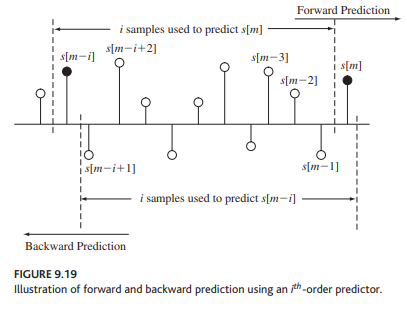

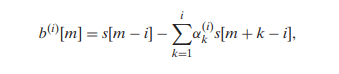

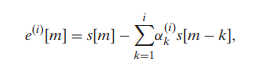

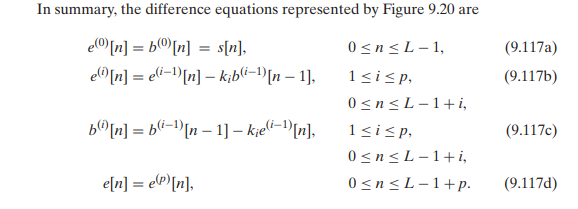

In [124]:
def levinson_durbin(input_data, order):
    
    e = np.zeros((order+1, len(input_data)))
    b = np.zeros((order+1, len(input_data)))
    
    kapa = np.zeros(order+1)
    
    e[0] = input_data.copy() # 초기값
    b[0] = input_data.copy() # 초기값

    for m in range(1, order+1):
        x = np.concatenate([e[m-1], np.zeros(m)])
        y = np.concatenate([np.zeros(1), b[m-1], np.zeros(m-1)])
#         print(np.dot(x, y))
        k = np.dot(x, y) / (LA.norm(x) * LA.norm(y))
        kapa[m] = k
#         print('m : ', m)
#         print('k : ', k)
        for n in range(len(input_data)):
            if n == 0:
                e[m][n] = e[m-1][n]
                b[m][n] = - (kapa[m] * e[m-1][n])
            else:
                e[m][n] = e[m-1][n] - (kapa[m] * b[m-1][n-1])
                b[m][n] = b[m-1][n-1] - (kapa[m] * e[m-1][n])
    
    
    return e[10], b[10], kapa
    

In [ ]:
    e = np.zeros((len(input_data), len(input_data[0])))
    b = np.zeros((len(input_data), len(input_data[0])))
    b[:,0] = - (kapa * e[:,0])

    # 이전 값들을 참조하여 현재 값을 계산
    for m in range(1, len(input_data)):
        e[m,:] = e[m-1,:] - (kapa[m] * b[m-1,:])
        b[m,1:] = b[m-1,:-1] - (kapa[m] * e[m-1,1:])
        b[m,0] = - (kapa[m] * e[m,0])


In [155]:
def lattice_filter(f_10, b_10, kapa, order, input_data):
    e = np.zeros((order+1, len(input_data)))
    b = np.zeros((order+1, len(input_data)))
    
    e[order] = f_10.copy()  # 초기값 설정
    b[order] = b_10.copy()  # 초기값 설정
    print("시작")
    for i in range(order, 0, -1):
        e[i-1,1:] = e[i,:-1] + kapa[i] * b[i-1,:-1]
        b[i,:-1] = b[i-1,1:] - kapa[i] * e[i-1,1:]
    
    e[0,1:] = e[1,:-1] + kapa[0] * b[0,:-1]
    b[0,:-1] = -kapa[0] * e[0,1:]
    
    print(b[0])
    
    return b[1]

In [156]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile

path = r"./" # 경로
fname = r"speech1.wav" # 파일 이름

fs, data = wavfile.read(path + fname)

f_10 = []
b_10 = []
kapa = []

f_10, b_10, kapa = levinson_durbin(data, 10)

s_n = lattice_filter(f_10, b_10, kapa, 10, data)

print(s_n)
wavfile.write("./lattice.wav", fs, s_n.astype(np.int16))

C:\Users\New\AppData\Local\Temp\ipykernel_1320\2079299579.py:9: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read(path + fname)


시작
[-0. -0. -0. ...  0. -0.  0.]
[ 0.          0.          0.         ...  3.32026162 -1.85933195
  0.        ]


In [151]:
wavfile.write("./lattice.wav", fs, s_n.astype(np.int16))